# Lab 06
Hao-Tien Kuo

## Predicting used car prices

In [16]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

In [17]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [18]:
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl") 
df["Mileage"] = df["Mileage"].str.rstrip(" km/g") 
df["Engine"] = df["Engine"].str.rstrip(" CC")
df["Power"] = df["Power"].str.rstrip(" bhp")

df["Power"]= df["Power"].replace(regex="null", value = np.nan) 

df["Fuel_Type"]=df["Fuel_Type"].astype("category") 
df["Transmission"]=df["Transmission"].astype("category")
df["Owner_Type"]=df["Owner_Type"].astype("category") 

df["Mileage"]=df["Mileage"].astype("float") 
df["Power"]=df["Power"].astype("float") 
df["Engine"]=df["Engine"].astype("float") 

df["Company"]=df["Name"].str.split(" ").str[0] 
df["Model"]=df["Name"].str.split(" ").str[1]+df["Name"].str.split(" ").str[2]

In [19]:
df.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4New
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,Hyundai,EONLPG
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,Nissan,MicraDiesel
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21 Lakh,17.50,Toyota,InnovaCrysta
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,Volkswagen,VentoDiesel
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,Tata,IndicaVista


In [20]:
df.dtypes

Name                   object
Location               object
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
New_Price              object
Price                 float64
Company                object
Model                  object
dtype: object

In [21]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
Company                 0
Model                   0
dtype: int64

In [26]:
df.dropna(subset=['Power', 'Engine', 'Kilometers_Driven', 'Year'], inplace=True)

df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   2
New_Price            5052
Price                   0
Company                 0
Model                   0
lnPrice                 0
dtype: int64

In [27]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,lnPrice
count,5876.000000,5.876000e+03,5874.000000,5876.000000,5876.000000,5874.000000,5876.000000,5876.000000
mean,2013.476515,5.832026e+04,18.273829,1625.466133,113.253050,5.283623,9.602665,1.845463
std,3.165822,9.213923e+04,4.371965,601.787379,53.874957,0.804961,11.246531,0.864012
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000,-0.820981
25%,2012.000000,3.344375e+04,15.260000,1198.000000,75.000000,5.000000,3.517500,1.257750
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000,1.749200
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.012500,2.303832
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000,5.075174


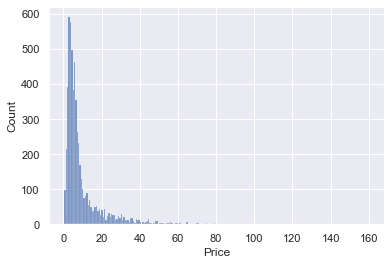

In [28]:
# Visualize the distribution of price

sns.set(style="darkgrid")
sns.histplot(data=df, x="Price")
plt.show()

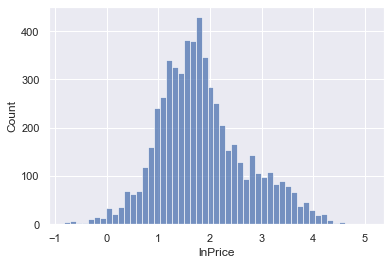

In [29]:
# Transform Price so that it looks more normal

df['lnPrice'] = np.log(df['Price'])
sns.histplot(data=df, x="lnPrice")
plt.show()

In [30]:
# Build a model of transformed price based on the other 4 variables
import statsmodels.api as sm

# define response variable
y = df['lnPrice']

# define explanatory variable
X = df[['Power', 'Engine', 'Kilometers_Driven', 'Year']]

# add constant to predictor variables
X = sm.add_constant(X)

# fit linear regression model
model = sm.OLS(y, X).fit()

# view model summary
print(model.summary())

# How much variance is explained?
# 83.2% of the variance in ln(price) is explained

                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     7279.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:07:57   Log-Likelihood:                -2234.0
No. Observations:                5876   AIC:                             4478.
Df Residuals:                    5871   BIC:                             4511.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -271.9753      3.01

In [31]:
# Compute the VIF of each variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif[1:]

# Which 2 are potential problems? 
# Power and Engine

,VIF,variable
1,4.115131,Power
2,4.156524,Engine
3,1.042054,Kilometers_Driven
4,1.051550,Year


In [ ]:
# Use PCA to create principal components and create a scree plot

In [ ]:
# Create / select 2 components and rerun the regression with transformed price, what is the amount of variance explained?

In [ ]:
# What is the VIF of the components?